In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
bike_data = pd.read_csv('daily_bike_rentals.csv')

In [3]:
bike_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
bike_data.shape

(731, 16)

In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


# Renaming columns with improper names.

In [7]:
bike_data.rename(columns = {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'holiday' : 'isHoliday',
    'workingday' : 'isWorkingday',
    'weathersit' : 'weatherSituation',
    'temp' : 'temperature',
    'atemp' : 'apparent_temperature',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace = True)

# Checking for null values in dataset.

In [8]:
bike_data.isnull().sum()

instant                 0
date                    0
season                  0
year                    0
month                   0
isHoliday               0
weekday                 0
isWorkingday            0
weatherSituation        0
temperature             0
apparent_temperature    0
humidity                0
windspeed               0
casual                  0
registered              0
count                   0
dtype: int64

# Plotting graphs to find relation of count with features.

## Most bikes are shared during fall. More bikes were shared in 2012 compared to 2011.

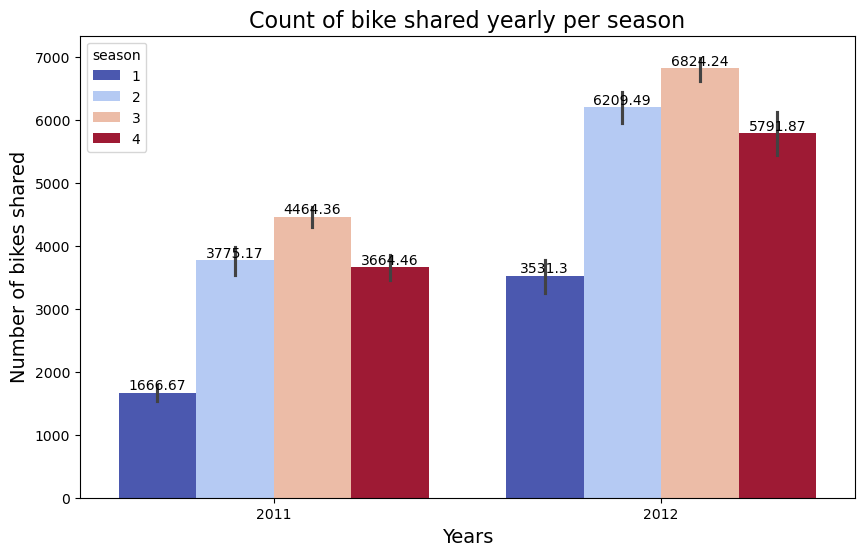

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = bike_data['year'], y = bike_data['count'], palette = 'coolwarm', hue = bike_data['season'])
ax.set_title("Count of bike shared yearly per season", fontsize = 16)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Years", fontsize = 14)
ax.set_ylabel("Number of bikes shared", fontsize = 14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['2011', '2012'])
plt.show()

## Comparision of bikes shared on a monthly basis in 2011 vs 2012.

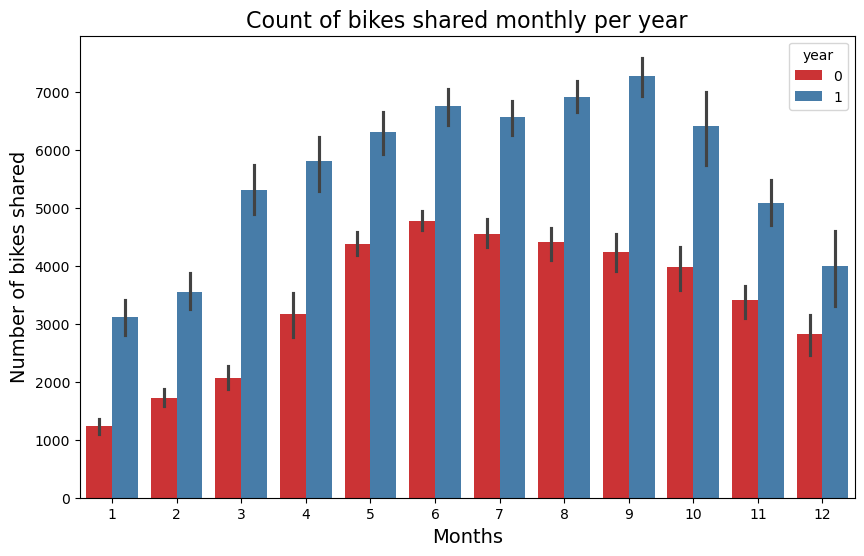

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = bike_data['month'], y = bike_data['count'], palette = 'Set1', hue = bike_data['year'])
ax.set_title("Count of bikes shared monthly per year", fontsize = 16)
ax.set_xlabel("Months", fontsize = 14)
ax.set_ylabel("Number of bikes shared", fontsize = 14)
plt.show()

## More bikes are shared on working days compared to holidays.

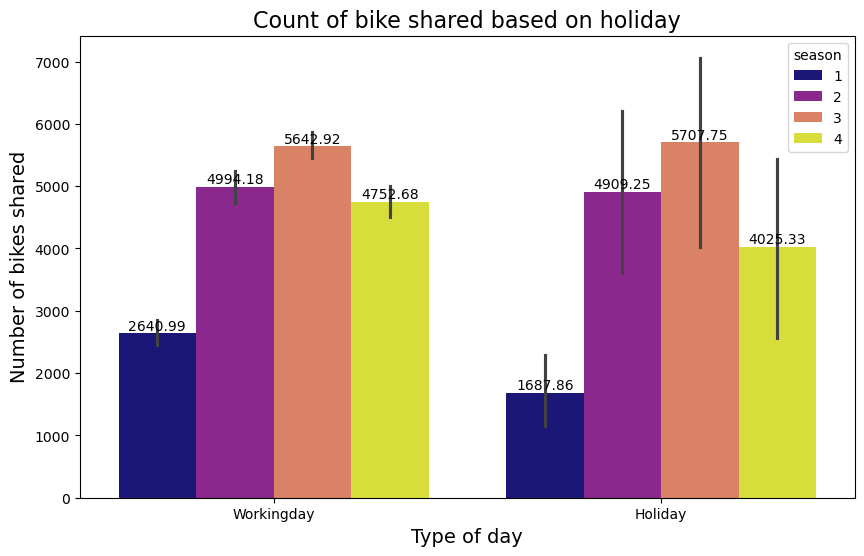

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = bike_data['isHoliday'], y = bike_data['count'], palette = 'plasma', hue = bike_data['season'])
ax.set_title("Count of bike shared based on holiday", fontsize = 16)
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel("Type of day", fontsize = 14)
ax.set_ylabel("Number of bikes shared", fontsize = 14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Workingday', 'Holiday'])
plt.show()

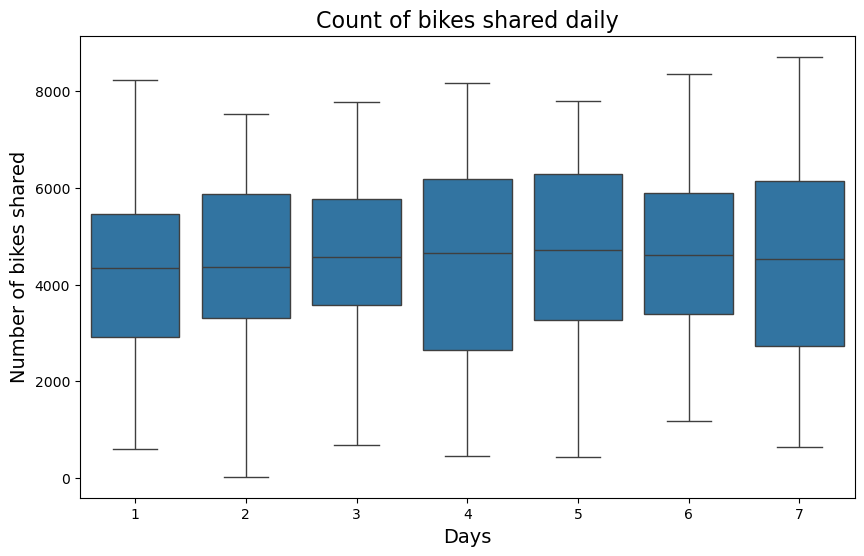

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x = bike_data['weekday'], y = bike_data['count'])
ax.set_title("Count of bikes shared daily", fontsize = 16)
ax.set_xlabel("Days", fontsize = 14)
ax.set_ylabel("Number of bikes shared", fontsize = 14)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels([1 , 2, 3, 4, 5, 6, 7])
plt.show()

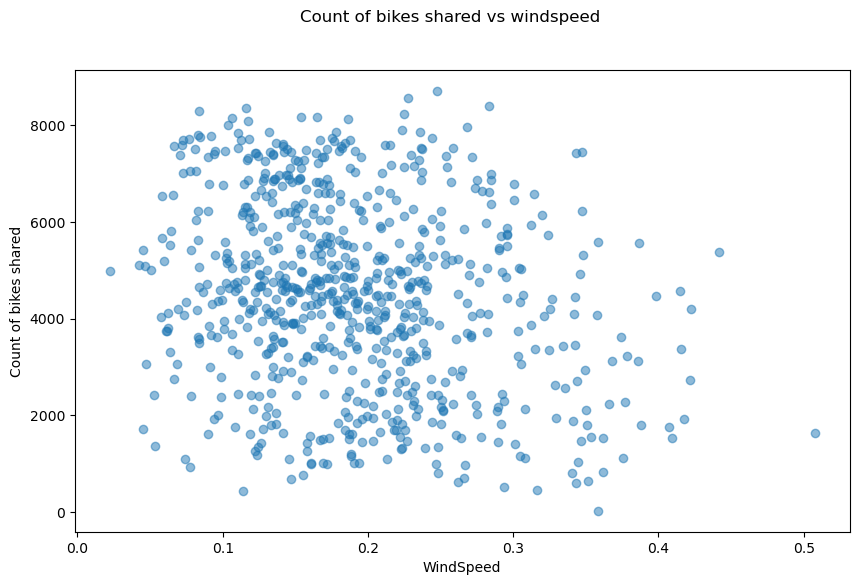

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x = bike_data['windspeed'], y = bike_data['count'], alpha = 0.5)
plt.suptitle('Count of bikes shared vs windspeed')
plt.xlabel('WindSpeed')
plt.ylabel('Count of bikes shared')
plt.show()

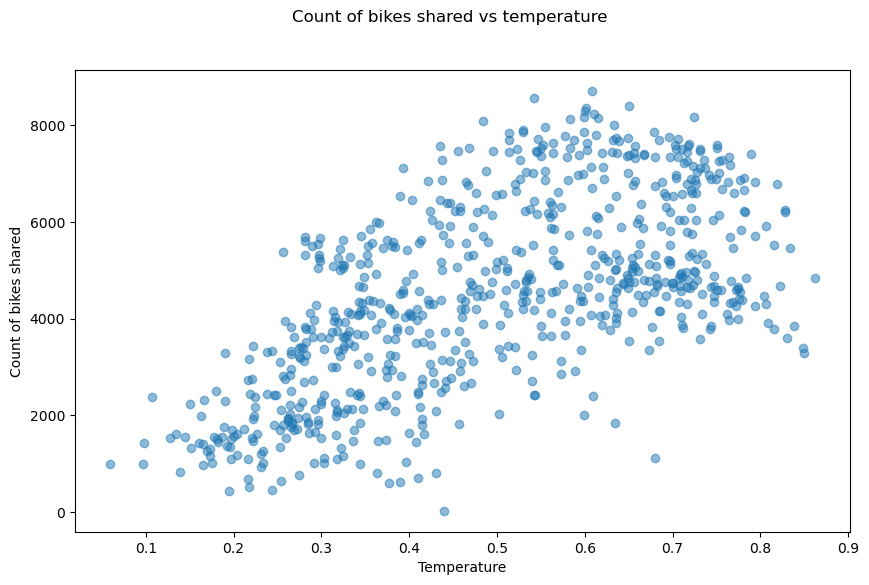

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x = bike_data['temperature'], y = bike_data['count'], alpha = 0.5)
plt.suptitle('Count of bikes shared vs temperature')
plt.xlabel('Temperature')
plt.ylabel('Count of bikes shared')
plt.show()

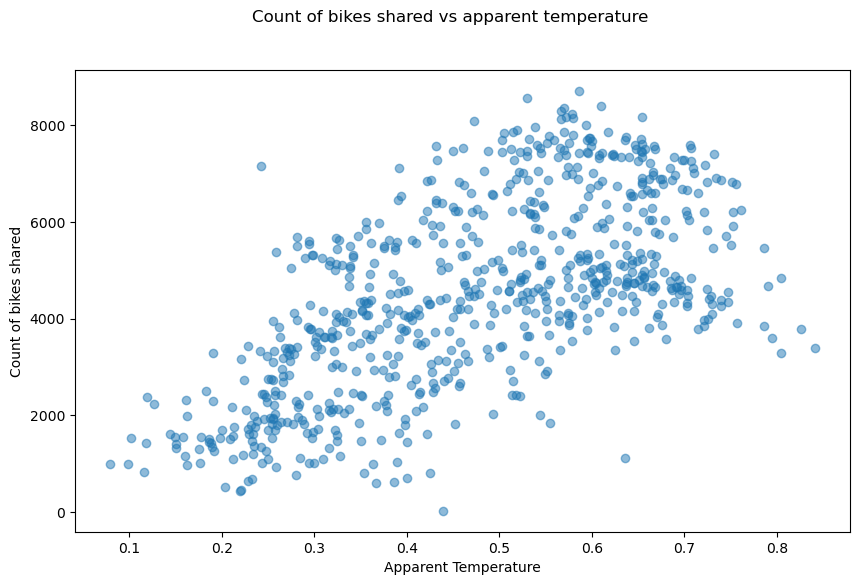

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x = bike_data['apparent_temperature'], y = bike_data['count'], alpha = 0.5)
plt.suptitle('Count of bikes shared vs apparent temperature')
plt.xlabel('Apparent Temperature')
plt.ylabel('Count of bikes shared')
plt.show()

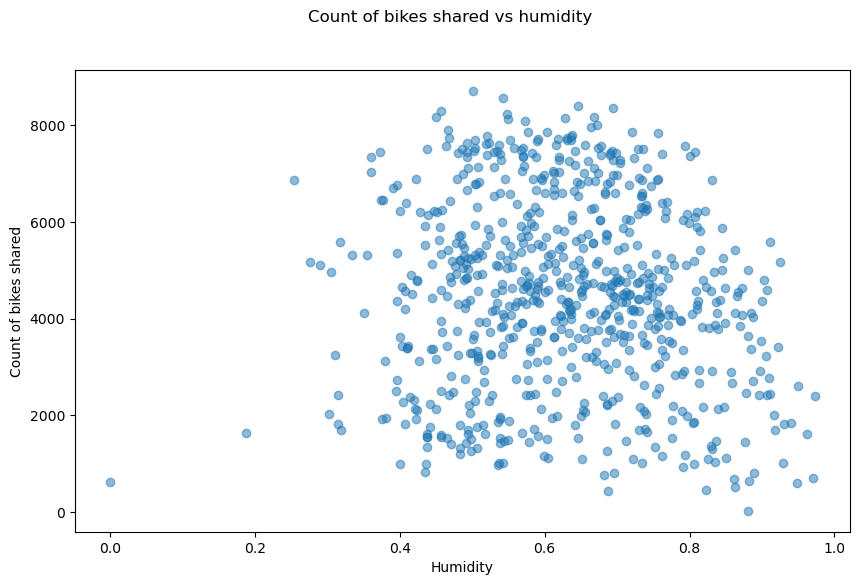

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(x = bike_data['humidity'], y = bike_data['count'], alpha = 0.5)
plt.suptitle('Count of bikes shared vs humidity')
plt.xlabel('Humidity')
plt.ylabel('Count of bikes shared')
plt.show()

In [17]:
correlation = bike_data.corr(numeric_only = True)

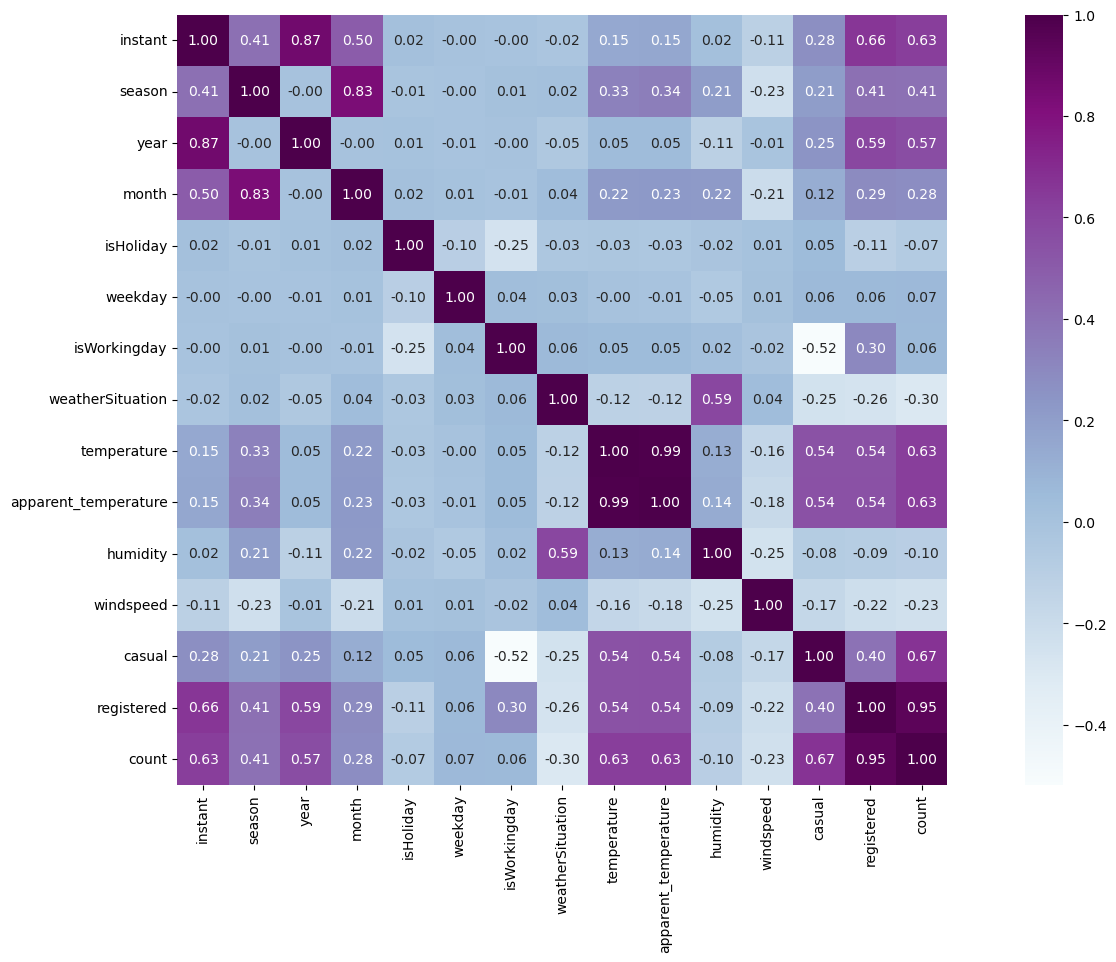

In [18]:
plt.subplots(figsize=(20,10))
sns.heatmap(correlation, square = True, annot = True, fmt=".2f", cmap = 'BuPu')
plt.show()

### Temperature and Apparent temperature have a very high correlation, so one of them can be dropped.

In [19]:
bike_data_new = bike_data.drop(columns = ['apparent_temperature', 'casual','registered', 'date'])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = bike_data_new.drop(columns = ["count"],axis=1)

In [22]:
Y = bike_data_new["count"]
Y2 = bike_data["casual"]
Y3 = bike_data["registered"]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Using Linear regression to predict count.

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
lr = lin_reg.score(X_train, Y_train)
print(lr)

0.790481864135355


In [26]:
test_preds = lin_reg.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(Y_test, test_preds))
print(rmse)

825.2971760192482


In [28]:
mae = mean_absolute_error(Y_test,test_preds)
print(mae)

616.9691509142133


In [29]:
r2_lr = r2_score(Y_test,test_preds)
print(r2_lr)

0.8301407922410714


In [30]:
Y_score = cross_val_score(lin_reg, X_train, Y_train, cv = 5, scoring = "neg_mean_squared_error")
cv_score = np.sqrt(-Y_score)
print(cv_score)
print(np.mean(cv_score))

[ 879.73579857  816.32878674  977.17767077 1023.93691229  775.29856087]
894.4955458460676


### Lets make a function that gives us the scores for a model.

In [31]:
def scoring(model, X_train, Y_train, Y_test, test_preds):
    rmse = np.sqrt(mean_squared_error(Y_test, test_preds))
    print('Root mean squared error: ', rmse)
    
    mae = mean_absolute_error(Y_test,test_preds)
    print('Mean absolute error: ', mae)
    
    r2score = r2_score(Y_test,test_preds)
    print('R-squared score: ', r2score)
    
    Y_score = cross_val_score(model, X_train, Y_train, cv = 5, scoring = "neg_mean_squared_error")
    cv_score = np.sqrt(-Y_score)
    print('Cross validation score (RMSE): ', cv_score)
    print('RMSE mean: ', np.mean(cv_score))

## Using ridge regression to predict count.

In [32]:
ridge_reg = Ridge(solver = "cholesky")
param_grid = {'alpha': np.logspace(-3, 3, 10)}

In [33]:
grid_search = GridSearchCV(ridge_reg, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

,estimator,Ridge(solver='cholesky')
,param_grid,{'alpha': array([1.0000...00000000e+03])}
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,np.float64(0.1)


In [34]:
best_params = grid_search.best_params_['alpha']
print(best_params)

0.1


In [35]:
ridge_new = Ridge(alpha = 0.1, solver = "cholesky")
ridge_new.fit(X_train, Y_train)
test_preds = ridge_new.predict(X_test)
scoring(ridge_new, X_train, Y_train, Y_test, test_preds)
r2_ridge = r2_score(Y_test, test_preds)

Root mean squared error:  829.1872600364427
Mean absolute error:  619.4704654904551
R-squared score:  0.8285357367810342
Cross validation score (RMSE):  [ 877.53730588  811.7050452   979.05094232 1025.0169392   777.64187024]
RMSE mean:  894.1904205653049


## There is not much improvement when we use Ridge. Lets try using Decision trees regressor.

In [36]:
DecisionTree_reg = DecisionTreeRegressor()
param_grid = {"min_samples_split": [10, 20, 30], "max_depth": [2, 4, 8], "min_samples_leaf": [20, 50, 100], "max_leaf_nodes": [5, 20, 100]}

In [37]:
grid_search = GridSearchCV(DecisionTree_reg, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [2, 4, ...], 'max_leaf_nodes': [5, 20, ...], 'min_samples_leaf': [20, 50, ...], 'min_samples_split': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [38]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 8, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [39]:
DecisionTree_reg_new = DecisionTreeRegressor(max_depth = 8, max_leaf_nodes = 20, min_samples_leaf = 20, min_samples_split = 10)
DecisionTree_reg_new.fit(X_train, Y_train)
test_preds = DecisionTree_reg_new.predict(X_test)
scoring(DecisionTree_reg_new, X_train, Y_train, Y_test, test_preds)
r2_dt = r2_score(Y_test, test_preds)

Root mean squared error:  984.3098274011586
Mean absolute error:  644.8154089436082
R-squared score:  0.7583804793779215
Cross validation score (RMSE):  [ 818.56345492  949.33236774 1139.39558973  854.6630576   816.88498874]
RMSE mean:  915.7678917454865


## Decision tree gave us a worse result. Lets try using random forest regressor.

In [40]:
RandomForest_reg = RandomForestRegressor()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4, 8]}

In [41]:
grid_search = GridSearchCV(RandomForest_reg, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [10, 20, ...], 'min_samples_leaf': [2, 4, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [42]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


## Lets try boosting models like Gradient Boosting Regressor.

In [43]:
RandomForest_reg_new = RandomForestRegressor(max_depth = 30, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
RandomForest_reg_new.fit(X_train, Y_train)
test_preds = RandomForest_reg_new.predict(X_test)
scoring(RandomForest_reg_new, X_train, Y_train, Y_test, test_preds)
r2_rf = r2_score(Y_test, test_preds)

Root mean squared error:  698.326394225407
Mean absolute error:  437.9192715517663
R-squared score:  0.8783855191310042
Cross validation score (RMSE):  [558.93632821 667.01373802 845.20945095 789.43133461 551.64832016]
RMSE mean:  682.447834388757


In [44]:
gbr = GradientBoostingRegressor(random_state = 42)

In [45]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [46]:
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')

In [47]:
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.9}


In [48]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100, random_state = 42)
gbr.fit(X_train, Y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [49]:
test_preds = gbr.predict(X_test)
scoring(gbr, X_train, Y_train, Y_test, test_preds)
r2_gbr = r2_score(Y_test, test_preds)

Root mean squared error:  634.4605422964667
Mean absolute error:  427.6037893093072
R-squared score:  0.8996129684711197
Cross validation score (RMSE):  [513.0600367  621.4893511  760.77843872 751.94978884 543.82437557]
RMSE mean:  638.2203981851181


# We get the best results from using Gradient Boosting Regressor.

# Lets try prediciting casual and registered user count separately now.

In [50]:
X_train, X_test, Y_casual_train, Y_casual_test, Y_registered_train, Y_registered_test = train_test_split(X, Y2, Y3, test_size = 0.2, random_state = 42)

In [51]:
gbr_casual = GradientBoostingRegressor(random_state = 42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator = gbr_casual, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')

In [52]:
grid_search.fit(X_train, Y_casual_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [53]:
gbr_casual = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 500, random_state = 42)
gbr_casual.fit(X_train, Y_casual_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [54]:
test_preds_casual = gbr_casual.predict(X_test)
scoring(gbr_casual, X_train, Y_casual_train, Y_casual_test, test_preds_casual)

Root mean squared error:  260.3553550162841
Mean absolute error:  165.5036304348389
R-squared score:  0.8260156249590394
Cross validation score (RMSE):  [217.53866003 291.39211442 268.35034929 352.20897093 287.56229536]
RMSE mean:  283.41047800647567


In [55]:
gbr_registered = GradientBoostingRegressor(random_state = 42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator = gbr_registered, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='neg_mean_squared_error')

In [56]:
grid_search.fit(X_train, Y_registered_train)
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [57]:
gbr_registered = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 200, random_state = 42)
gbr_registered.fit(X_train, Y_registered_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [58]:
test_preds_registered = gbr_registered.predict(X_test)
scoring(gbr_registered, X_train, Y_registered_train, Y_registered_test, test_preds_registered)

Root mean squared error:  528.0857563165981
Mean absolute error:  322.10768733389847
R-squared score:  0.8982645170911023
Cross validation score (RMSE):  [415.12985052 466.45718    555.58333106 594.50065659 445.94169693]
RMSE mean:  495.5225430221286


In [59]:
final_preds = test_preds_casual + test_preds_registered

In [60]:
final_count = Y_casual_test + Y_registered_test

In [61]:
r2_gbrcr = r2_score(final_count, final_preds)
mae = mean_absolute_error(final_count, final_preds)
mse = mean_squared_error(final_count, final_preds)
rmse = np.sqrt(mse)
print('r2 score: ', r2_gbrcr)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

r2 score:  0.8968243260320459
MAE:  390.73020251076525
MSE:  413722.30765676085
RMSE:  643.2124902835461


# Comparing the r2 score of all models to predict the count.

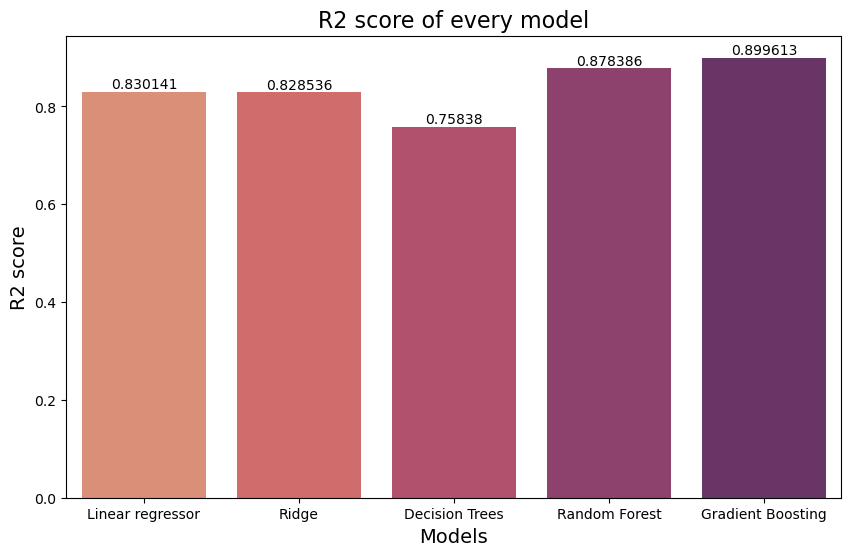

In [62]:
models = ['Linear regressor', 'Ridge', 'Decision Trees', 'Random Forest', 'Gradient Boosting']
r2_scores = [r2_lr, r2_ridge, r2_dt, r2_rf, r2_gbr]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = models, y = r2_scores, palette = 'flare', hue = models)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("R2 score of every model", fontsize = 16)
ax.set_xlabel("Models", fontsize = 14)
ax.set_ylabel("R2 score", fontsize = 14)
plt.show()

# Comparing the r2 score of the model predicting count vs model predicting causual + registered users.

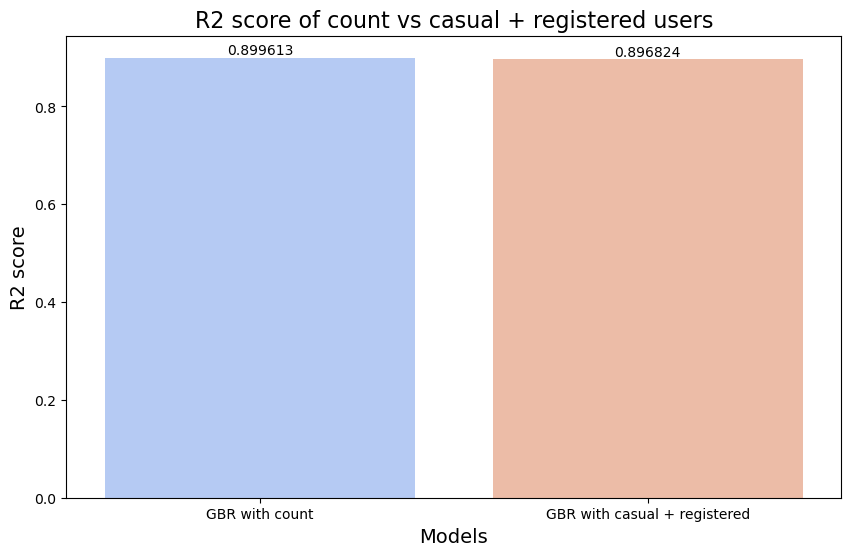

In [64]:
models = ['GBR with count', 'GBR with casual + registered']
r2_scores = [r2_gbr, r2_gbrcr]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = models, y = r2_scores, palette = 'coolwarm', hue = models)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("R2 score of count vs casual + registered users", fontsize = 16)
ax.set_xlabel("Models", fontsize = 14)
ax.set_ylabel("R2 score", fontsize = 14)
plt.show()